<a href="https://colab.research.google.com/github/laya143/MINI-PROJECT-ML/blob/main/MINI_PROJECT_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread



In [4]:
target = [] 
images = [] # Matrix Format
flat_data = [] 
DATADIR = '/content/drive/MyDrive/images'

CATEGORIES = ['cars','ice cream cone','plastic water bottles']

for i in CATEGORIES:
  class_target = CATEGORIES.index(i) # Label Encoded the Target value
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) # Skimage normalizes the value
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_target)
    #print(img_resized.shape)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [5]:
df = pd.DataFrame(flat_data)
df['Target'] = target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.543723,0.738355,0.781440,0.536054,0.739507,0.782592,0.484253,0.699088,0.737168,0.433256,0.669020,0.698092,0.422902,0.676758,0.704105,0.435232,0.704033,0.722804,0.459635,0.728314,0.743922,0.558651,0.739095,0.755650,0.576273,0.744540,0.755991,0.593058,0.753926,0.756331,0.654475,0.805781,0.803024,0.689518,0.830591,0.822696,0.697325,0.825586,0.809952,0.697479,...,0.853595,0.743791,0.547712,0.877804,0.771817,0.575739,0.887843,0.797647,0.593725,0.887477,0.792680,0.588758,0.846797,0.744837,0.544837,0.912157,0.801569,0.605490,0.909752,0.794039,0.597961,0.849464,0.724706,0.531817,0.722667,0.607843,0.421020,0.871634,0.781438,0.606641,0.876863,0.786667,0.614118,0.877333,0.783059,0.602667,0.843137,0.737255,0.552941,0
1,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0
2,0.701490,0.789843,0.869647,0.700353,0.803922,0.866667,0.715098,0.823059,0.870000,0.729490,0.839412,0.878392,0.711765,0.813608,0.850863,0.727569,0.806000,0.852941,0.745098,0.801961,0.860784,0.755020,0.796196,0.868627,0.733569,0.808078,0.884431,0.743137,0.808078,0.886039,0.752941,0.811765,0.884078,0.761137,0.811882,0.878431,0.780275,0.833098,0.891922,0.762510,...,0.212902,0.221765,0.281216,0.495412,0.539451,0.314000,0.820471,0.870863,0.219843,0.876431,0.881961,0.020863,0.843686,0.778314,0.060235,0.535529,0.441686,0.016745,0.313922,0.226667,0.001412,0.227961,0.202941,0.046196,0.216039,0.176706,0.160471,0.215922,0.162510,0.276706,0.212353,0.173922,0.277098,0.224667,0.219451,0.207059,0.159451,0.174431,0.093373,0
3,0.000000,0.505046,0.681516,0.000000,0.501124,0.681629,0.000000,0.497572,0.682343,0.000000,0.494231,0.685841,0.000000,0.497294,0.695126,0.000000,0.498039,0.703699,0.000000,0.497621,0.707227,0.000000,0.497767,0.710193,0.000000,0.498039,0.709715,0.000000,0.497887,0.698288,0.000000,0.494536,0.694536,0.000000,0.494536,0.694536,0.000418,0.494954,0.694954,0.000837,...,0.280649,0.213983,0.186532,0.280805,0.214138,0.186687,0.290673,0.224007,0.196556,0.298288,0.231621,0.204170,0.308344,0.238863,0.211412,0.316275,0.249608,0.222157,0.321150,0.254691,0.227033,0.316444,0.249778,0.222327,0.310561,0.243229,0.215778,0.303072,0.236405,0.208954,0.286177,0.219510,0.192059,0.281582,0.214915,0.187464,0.280523,0.213856,0.186405,0
4,0.961078,0.800294,0.719797,0.948157,0.794010,0.701745,0.967297,0.823248,0.720634,0.925742,0.788487,0.671493,0.897765,0.757343,0.625647,0.956389,0.797297,0.658588,0.924585,0.748176,0.602056,0.966314,0.770324,0.623696,0.984641,0.812729,0.664464,0.935464,0.797487,0.691569,0.920118,0.788647,0.683088,0.911729,0.785196,0.686294,0.916294,0.795748,0.695752,0.914471,...,0.620824,0.525905,0.258333,0.657641,0.582225,0.298892,0.659402,0.589578,0.295461,0.652925,0.559271,0.274993,0.688441,0.577209,0.339268,0.660725,0.546353,0.327392,0.678856,0.559072,0.325039,0.709585,0.595356,0.330248,0.760647,0.658039,0.368167,0.638448,0.534405,0.265056,0.804095,0.703252,0.476248,0.807245,0.674775,0.443304,0.773686,0.634827,0.398239,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [6]:
df['Target'].nunique()

3

In [7]:
c=df['Target'].value_counts()
c

1    30
0    30
2    29
Name: Target, dtype: int64

<BarContainer object of 3 artists>

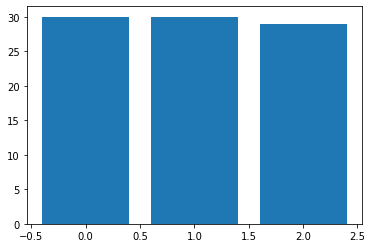

In [8]:
plt.bar(c.index,c)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 2, 1])

In [12]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [14]:
accuracy_score(y_pred,y_test)*100

85.18518518518519

In [15]:
import pickle
pickle.dump(clf,open('image_model.p','wb'))

In [16]:
model=pickle.load(open('image_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR7G_1Ydprhj8bOYPHJUq9FLy_tCcIUpAFfkQ&usqp=CAU
(225, 225, 3)
PREDICTED OUTPUT: plastic water bottles


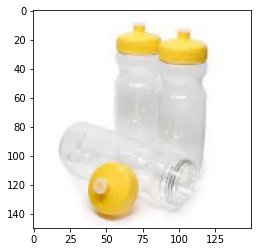

In [54]:
flat_data=[]
url=input('Enter your URL')
img = imread(url)
img_resized =resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [55]:

!pip install streamlit
!pip install pyngrok==4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.7MB/s 
     |████████████████████████████████| 4.2MB 41.5MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 112kB 38.9MB/s 
     |████████████████████████████████| 163kB 44.3MB/s 
     |████████████████████████████████| 122kB 46.9MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=bce82a278270b7a0990cee73c4815a7cbfc0e39b29acc667318ed8701689dc97
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp37-none-any.whl size=15971 sha256=716a91b2a292000b84820ba154582cae4ea04f01065617aaed54bcf860c94233
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [64]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('IMAGE CLASSIFICATION USING MACHINE LEARNING')
st.write(' ')
st.write(' ')
st.text('UPLOAD AN IMAGE:')

model=pickle.load(open('image_model.p','rb'))

uploaded_file=st.file_uploader("select an image from your pc...",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.write(' ')
  st.write(' ')
  st.image(img,caption='UPLOADED IMAGE')

  if st.button('PREDICT'):
    CATEGORIES=['cars','ice cream cone','plastic water bottles']
    st.write('PREDICTION IS:')
    flat_data=[]
    img = np.array(img)
    img_resized =resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    print(img.shape)
    y_out=model.predict(flat_data)
    y_out=CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    st.write(' ')
    st.write('PERCENTAGE OF ACCURACY:')
    q=model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item}:{q[0][index]*100}')




Overwriting app.py


In [57]:
!nohup streamlit run app.py &
public_url=ngrok.connect(port='8501')
print(public_url)

nohup: appending output to 'nohup.out'
http://bb14ca3c907e.ngrok.io
